In [ ]:
!pip install scikit-plot
!pip install plot-metric

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from imblearn.over_sampling import SMOTENC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import KFold
import scikitplot as skplt
from plot_metric.functions import BinaryClassification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import ParameterGrid
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dataset reading
We are working on the cleveland.processed data.

In [ ]:
input_path = '/content/drive/MyDrive/MML/processed.cleveland.data'
attributes = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [ ]:
df = pd.read_csv(input_path, header= None)
df.columns = attributes

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


### first exploration

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# preprocessing

since our analysis will focus on the presence (target value 1,2,3,4) or absence (target value 0) of heart disease we set only two possible values for the target column. We also delete the value with '?' attributes.

In [ ]:
df = df.drop(df[df['ca'] == '?'].index)
df = df.drop(df[df['thal'] == '?'].index)

df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])


df.reset_index(inplace = True, drop= True)


df.loc[df['target'] > 1, 'target'] = 1
df['target'].value_counts()   # check if we have only 0 and 1 as values

0    160
1    137
Name: target, dtype: int64

### missing values
let's check if we have missing values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


the non-null count confirms that there is no missing values

#visualizations

In [ ]:
# set here params for the plot
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_palette('plasma')
plt.rcParams.update(params)

# change folder to save the images in the proper spot
%cd /content/drive/MyDrive/MML/visualizations/report

/content/drive/MyDrive/MML/visualizations/report


### class distributions

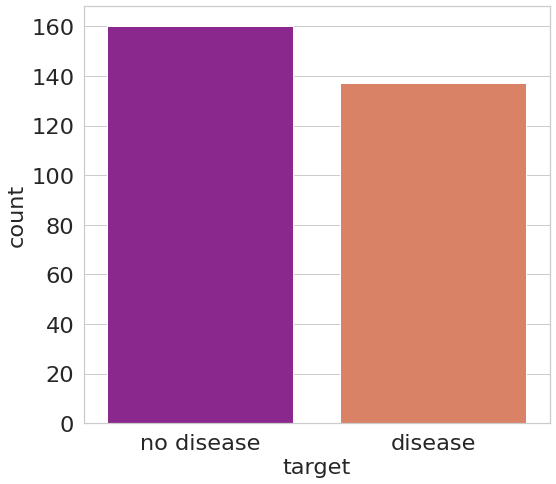

In [ ]:
g = sns.countplot(x= df['target'], palette = 'plasma')
g.set_xticklabels(['no disease','disease'])
plt.tight_layout()
plt.savefig('class_dist.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
plt.show()

### features correlation
measured with pearson correlation for numerical attributes

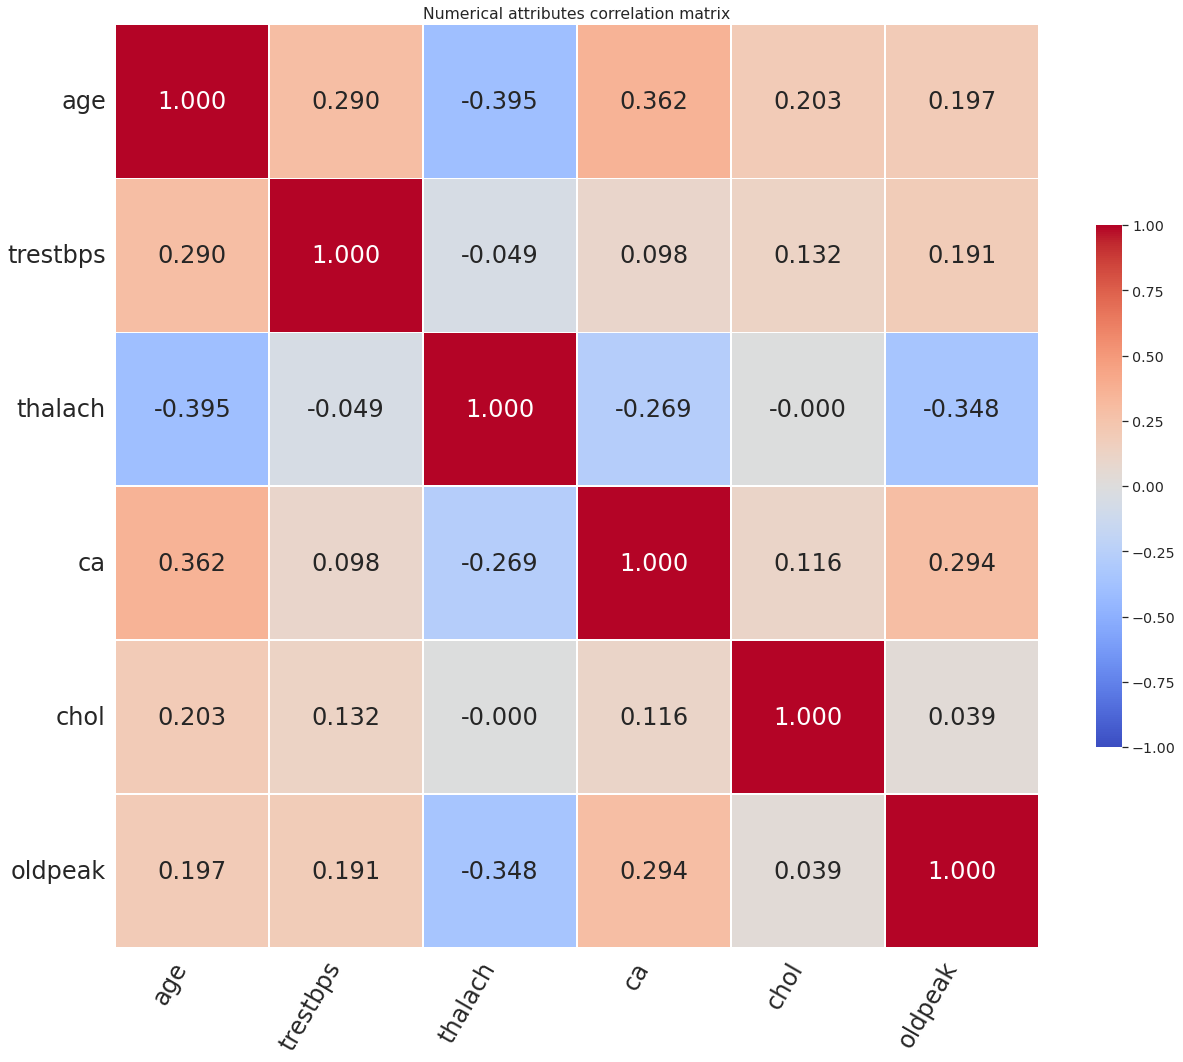

In [ ]:
numerical = ['age', 'trestbps', 'thalach', 'ca', 'chol', 'oldpeak']
corr= df[numerical].corr()

fig, ax = plt.subplots(figsize=(18, 16))
sns.set(font_scale=1.3)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
        data=corr,
        vmin=-1.0,
        vmax=1.0,
        center=0,
        square=True,
        linewidths=0.5,
        linecolor='w',
        annot=True,
        cmap = 'coolwarm',
        fmt='.3f',
        annot_kws={"fontsize":24},
        cbar_kws={"shrink": .5},
        #mask=mask,          #uncomment to make it only upper
        ax=ax
    )

#adjust label inclination to be readable
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right', fontsize=24)
ax.set(title='Numerical attributes correlation matrix')
plt.savefig('correlation_attributes.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
plt.tight_layout()
plt.show()

### features distribution

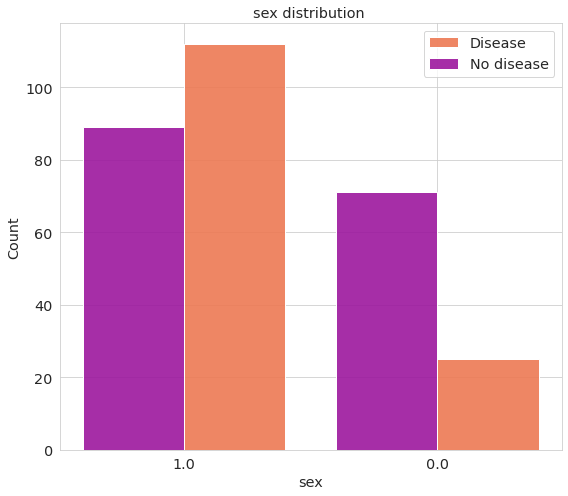

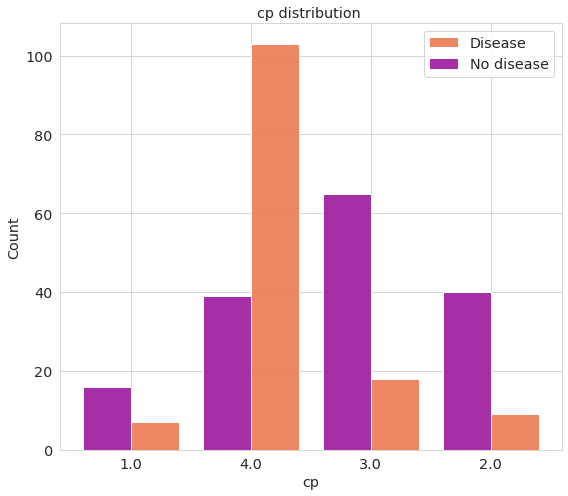

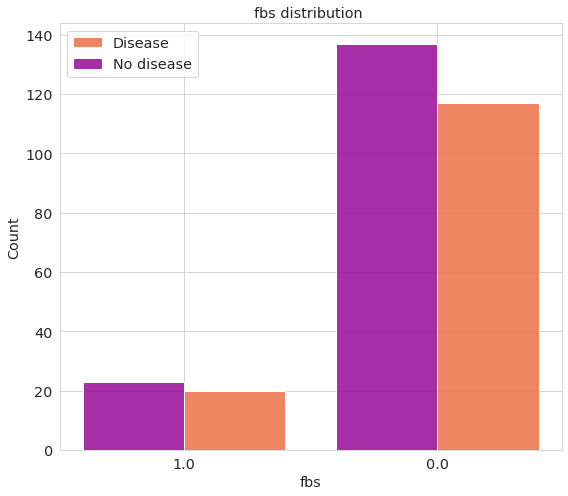

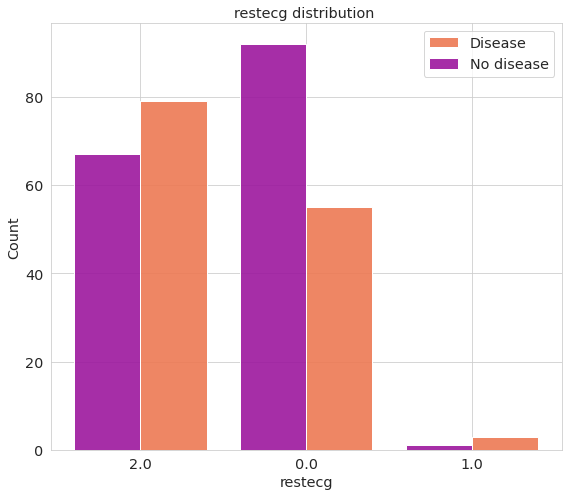

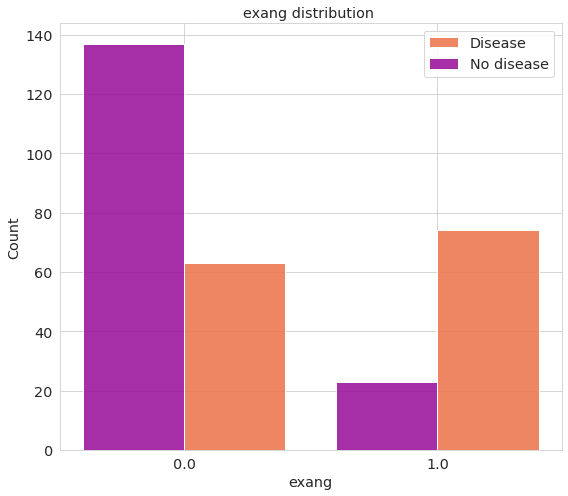

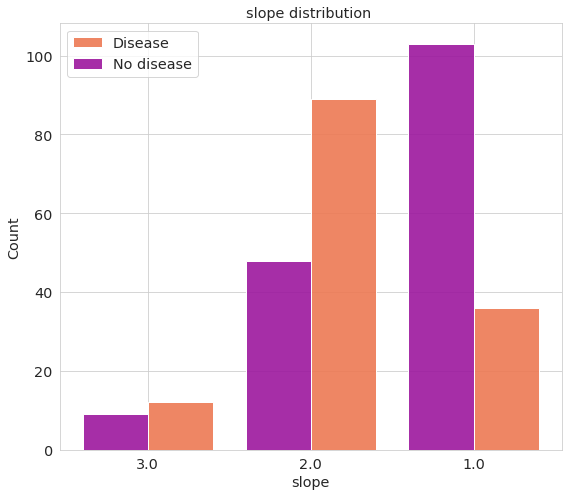

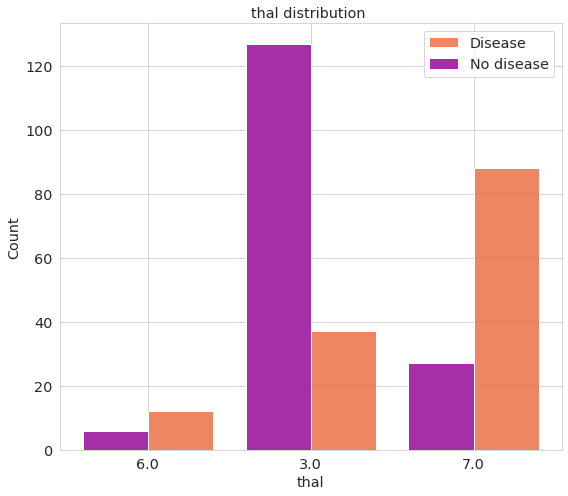

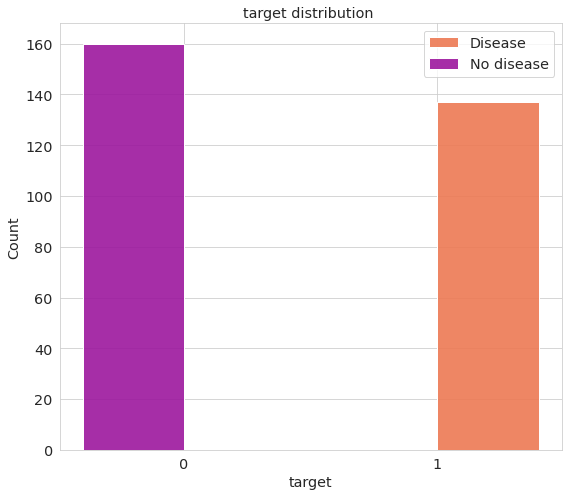

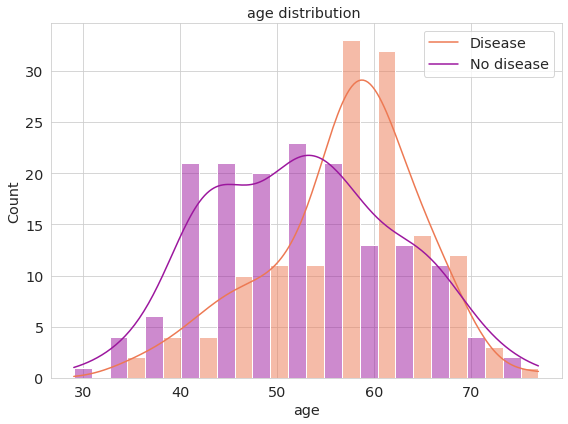

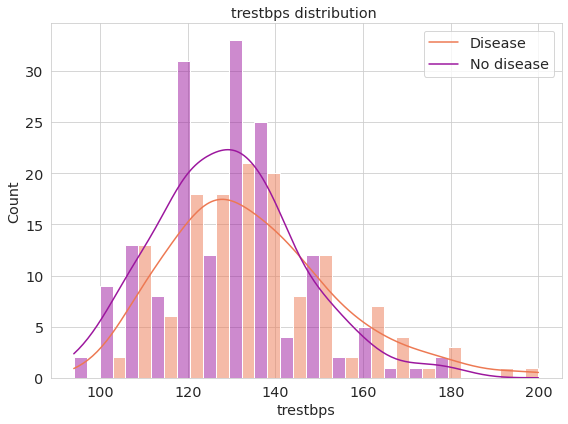

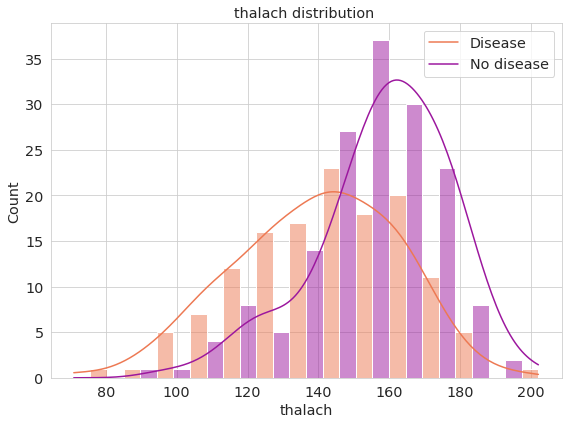

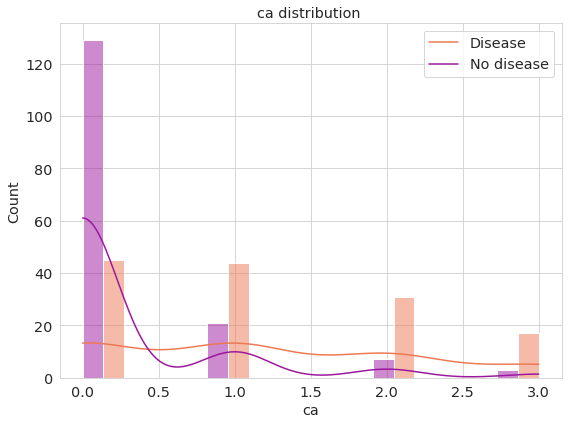

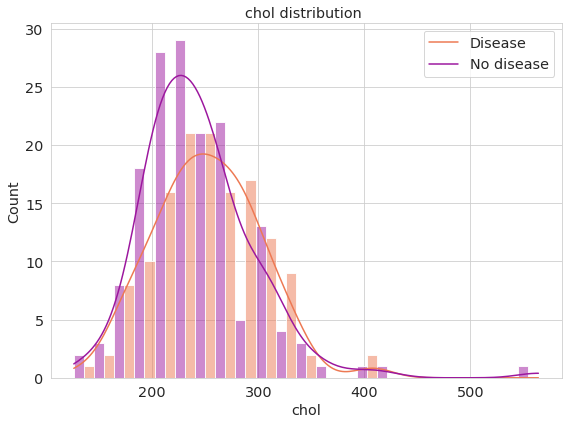

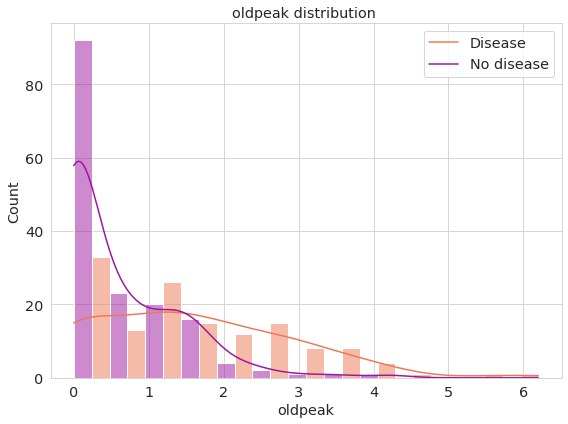

In [ ]:

# list of categorical and numerical attribute:
numerical = ['age', 'trestbps', 'thalach', 'ca', 'chol', 'oldpeak']
categorical = filter(lambda i: i not in numerical, attributes)

for attribute in categorical:
      # turn into string so they are recognized as categorical
      df_cat = df
      df_cat[attribute] = df_cat[attribute].apply(lambda x: str(x))
      df_cat.loc[df_cat['sex'] == '1.0', 'gender'] = 'male'
      df_cat.loc[df_cat['sex'] == '0.0', 'gender'] = 'female'

      
      sns.histplot(x=attribute, multiple= 'dodge', hue='target', shrink= .8, data=df_cat, palette = 'plasma', alpha= 0.9)
      #sns.kdeplot(data=df_0[attribute], fill = True, palette = 'plasma')
      #sns.kdeplot(data=df_1[attribute], fill = True, palette = 'plasma')

      plt.title(attribute + ' distribution ')
      plt.tight_layout()
      plt.legend( ['Disease', 'No disease'])

      plt.savefig(attribute + 'distribution.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
      plt.show()


for attribute in numerical:
      
      plt.figure(figsize=(8,6))
      sns.histplot(x=attribute, multiple= 'dodge', hue='target', shrink= 1, data=df, palette = 'plasma', kde= True)
      #sns.kdeplot(data=df_0[attribute], fill = True, palette = 'plasma')
      #sns.kdeplot(data=df_1[attribute], fill = True, palette = 'plasma')

      plt.title(attribute + ' distribution ')
      plt.tight_layout()
      plt.legend( ['Disease', 'No disease'])

      plt.savefig(attribute + 'distribution.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
      plt.show()


In [ ]:
df['ca']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
292    0.0
293    0.0
294    2.0
295    1.0
296    1.0
Name: ca, Length: 297, dtype: object

### pairplot

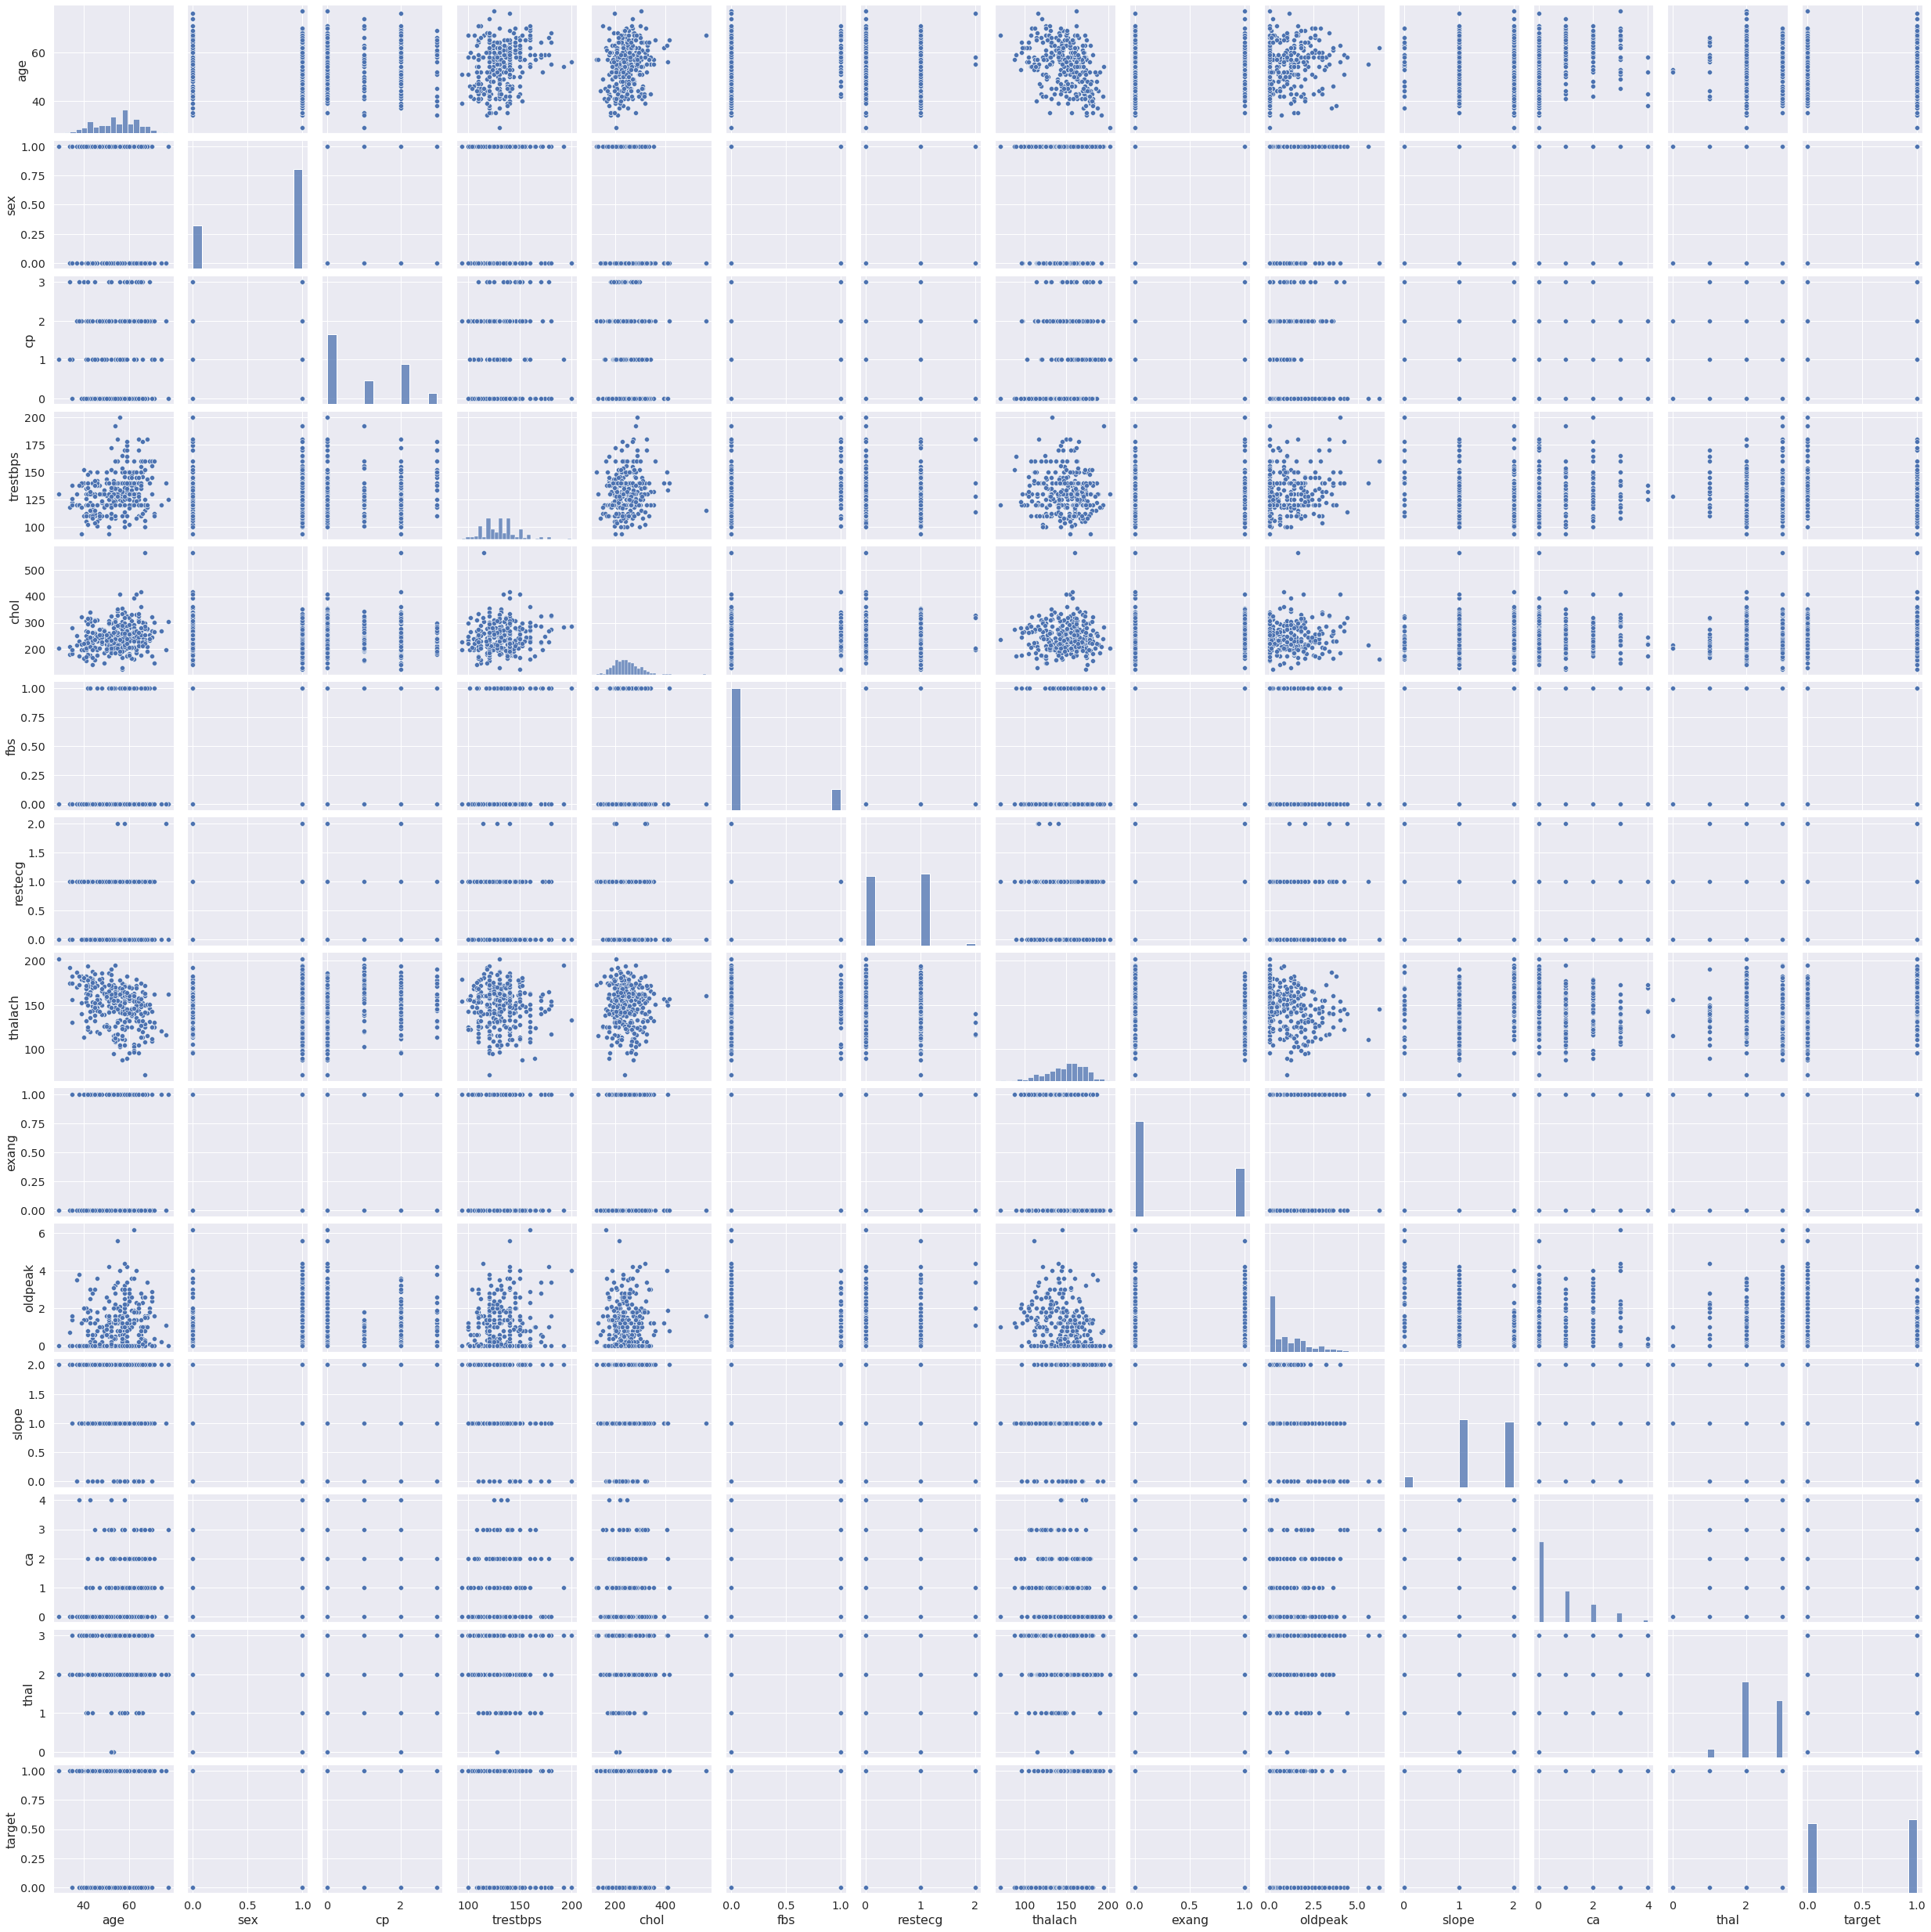

In [ ]:
sns.pairplot(df)

#preprocessing
the following blocks are the stages of the pipeline developed. All the pipeline is then implemented under the "functions" block inside tailored functions to train the models. Those following blocks were used to test and develop the code. 

In [ ]:
# splitting of data-set with 80% of samples for training set
X = df.drop(labels = 'target', axis = 1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

### outliers detection
Local Outlier Factor (LOF) algorithm.

In [ ]:
out_rem = LocalOutlierFactor(n_neighbors=10)
outliers = out_rem.fit_predict(X_train)
mask = outliers != -1
print("Num samples before outlier removal: ", len(X_train))
# removing outliers
X_train, y_train = X_train[mask], y_train[mask]
print("Num samples after outlier removal: ", len(X_train))
len(X_train)

Num samples before outlier removal:  237
Num samples after outlier removal:  227


227

### SMOTE (SMOTENC)
since we have also categorical features, we need to avoid that categorical features are interpolated too. Same applies for the ca attribute which can have only 4 values and no mid-values

In [ ]:
# we need to pass to the function the features that does not not need to be interpolated
smote_categorical = ['cp', 'restecg', 'slope', 'ca', 'thal']
smote_mask = list(item in smote_categorical for item in list(X.columns))

smote = SMOTENC(smote_mask,random_state = 1998)
X_res, y_res = smote.fit_resample(X, y)

### normalization
since we did outlier removal, we can perform normalization (or min-max scaling). This of course applies only to the numerical features

In [ ]:
attributes = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
boolean = ['sex','exang','fbs']
numerical = ['age', 'trestbps', 'thalach', 'ca', 'chol', 'oldpeak']
categorical = ['cp', 'restecg', 'slope',  'thal']

scaler = MinMaxScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])

### categorical variables handling
the categorical variables are encoded with ordinal encoding, which might provide some problems since it could introduce some unwanted notions of ordering among values. Let's turn it into OHE, by avoiding to re-encode the already binary variables sex, exang, fbs




In [ ]:
#categorical = list(filter(lambda i: i not in numerical + ['exang', 'sex', 'fbs' ], attributes))
#remaining = [item for item in attributes if item not in categorical]

attributes = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
boolean = ['sex','exang','fbs']
numerical = ['age', 'trestbps', 'thalach', 'ca', 'chol', 'oldpeak']
categorical = ['cp', 'restecg', 'slope',  'thal']

# extract the categorical column 
cat_cols = X_train[categorical]

# extract remaining data 
non_cat_cols = X_train[boolean + numerical]

# OHE the categorical columns
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(cat_cols)
ohe_cols = enc.transform(cat_cols).toarray()

# convert it to df
ohe_cols = pd.DataFrame(data = ohe_cols, index = cat_cols.index)

# join together the two dataframe
X_train = pd.concat([ohe_cols, non_cat_cols], axis=1)

#new_df = pd.get_dummies(X_train, columns = categorical)
#enc.fit(X_train)
#new_df = pd.DataFrame(enc.transform(X_train).toarray())




### PCA
after OHE we have 22 features, almost double as the starting. In order to avoid to fall in the curse of dimensionality, we exploit PCA. Since the number of features is still reasonable, we expect PCA to  not affect heavily the overall performances. Graph inspired from: https://rukshanpramoditha.medium.com/principal-component-analysis-18-questions-answered-4abd72041ccd

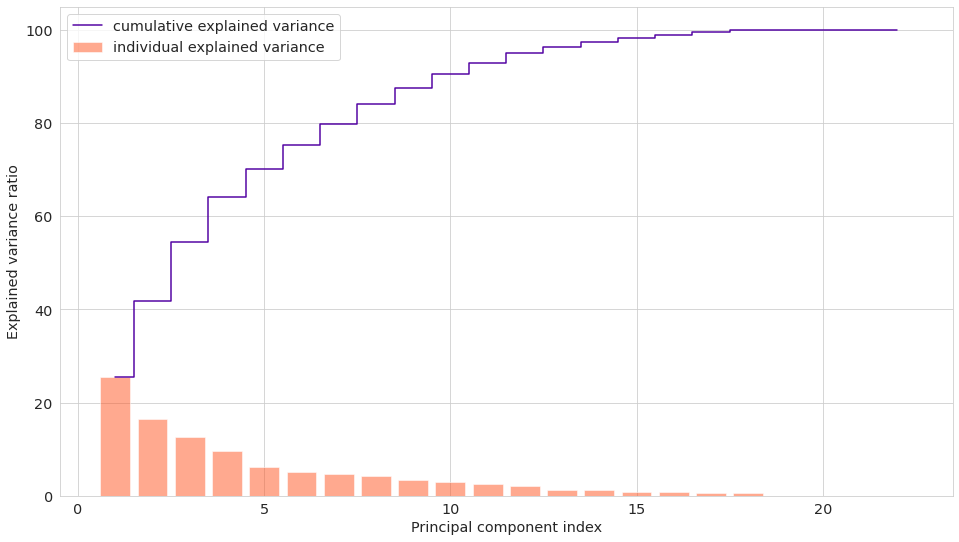

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_train)

var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(16, 9))
plt.bar(range(1,23), var_exp, alpha=0.5, align='center', label='individual explained variance', color = '#ff5521')
plt.step(range(1,23), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

plt.legend(loc='best')
plt.savefig('PCA.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )

# functions

In [ ]:
# splitting of data-set with 80% of samples for training set
X = df.drop(labels = 'target', axis = 1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=420)

In [ ]:
def evaluate_model(model, param_grid, X_train, X_test, y_train, y_test,
            run_name,
            oversampling,
            outliers_removal = True, 
            pca = True,
            pca_components = None,
            std = True
            ):

  # Outliers removal
  if outliers_removal:
    out_rem = LocalOutlierFactor(n_neighbors=10)  #LOF algorithm
    outliers = out_rem.fit_predict(X_train)
    mask = (outliers != -1)
    print("Num samples before outlier removal: ", len(X_train))
    # removing outliers
    X_train, y_train = X_train[mask], y_train[mask]
    print("Num samples after outlier removal: ", len(X_train))


  print('Performing cross-validation...')
  # grid search on parameters
  score_list = []
  params_list = []
  for params in ParameterGrid(param_grid):
      score_list.append(cv_pipeline(model, params, X_train, y_train, pca, pca_components, std, oversampling = oversampling))
      params_list.append(params)
  
  print('Done. ')

  # choosing best configuration
  results = np.array(list(zip(params_list, score_list)))
  best_conf = results[results[:, 1].argmax(), 0]
  print("Best configuration: ", best_conf, "\n")

  print('testing best configuration on the whole training data...')
  # test the best model on whole data
  accuracy, precision, recall, f1 = test_model(model, best_conf, X_train, X_test, y_train, y_test,
                                                run_name,
                                                outliers_removal = outliers_removal, 
                                                oversampling = oversampling,
                                                pca = pca,
                                                pca_components = pca_components,
                                                std = std)


  return accuracy, precision, recall, f1 

  

In [ ]:
def cv_pipeline(model, params, X, y,
                pca, pca_components, std,
                oversampling,
                ):
  
  cv = KFold(n_splits=5)  # stratified fold to keep the same class proportion  
  score_list = []
  attributes = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
  boolean = ['sex','exang','fbs']
  numerical = ['age', 'trestbps', 'thalach', 'ca', 'chol', 'oldpeak']
  categorical = ['cp', 'restecg', 'slope',  'thal']

  
  # for each indexes set of training folds and validation fold of the 5 splits
  for fold, (train_index, test_index) in enumerate(cv.split(X, y)):
      X_train, y_train = X.iloc[train_index], y[train_index]
      X_test, y_test = X.iloc[test_index], y[test_index]

      ## categorical features OHE ##
      # extract the categorical column 
      cat_cols_train = X_train[categorical]
      cat_cols_test = X_test[categorical]

      # extract remaining data 
      non_cat_cols_train = X_train[boolean + numerical]
      non_cat_cols_test = X_test[boolean + numerical]

      # declare the encoder
      enc = OneHotEncoder(handle_unknown='ignore')

      # fit only on the train split to avoid data leakage
      enc.fit(cat_cols_train)

      # get the OHE columns
      ohe_cols_train = enc.transform(cat_cols_train).toarray()
      ohe_cols_test = enc.transform(cat_cols_test).toarray()

      # convert them to df
      ohe_cols_train = pd.DataFrame(data = ohe_cols_train, index = cat_cols_train.index)
      ohe_cols_test = pd.DataFrame(data = ohe_cols_test, index = cat_cols_test.index)

      # join back together the non categorical features
      X_train = pd.concat([ohe_cols_train, non_cat_cols_train], axis=1)
      X_test = pd.concat([ohe_cols_test, non_cat_cols_test], axis=1)

      # oversampling with SMOTE
      if oversampling:
        smote_categorical = ['cp', 'restecg', 'slope', 'ca', 'thal']
        smote_mask = list(item in smote_categorical for item in list(X.columns))
        smote = SMOTENC(smote_mask,random_state = 1998)
        X_train, y_train = smote.fit_resample(X_train, y_train)

      # features scaling
      if std:
        norm = StandardScaler()
      else:
        norm = MinMaxScaler()
      X_train = norm.fit_transform(X_train)
      X_test = norm.transform(X_test)

      
      # PCA
      if pca:
        pca = PCA(n_components = pca_components)
        X_train = pca.fit_transform(X_train) #fit only on training set
        X_test = pca.transform(X_test)


      # train the model
      train_model = model(**params).fit(X_train, y_train)
      # predict and validate the model with f1 
      y_pred = train_model.predict(X_test)
      score = f1_score(y_test, y_pred)
      score_list.append(score)
  
  # return mean score among the splits
  return np.array(score_list).mean()


In [ ]:
def test_model(model, best_params, X_train, X_test, y_train, y_test,
                run_name, std,
                outliers_removal = True, 
                oversampling = True,
                pca = True,
                pca_components = None
              ):
  attributes = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
  boolean = ['sex','exang','fbs']
  numerical = ['age', 'trestbps', 'thalach', 'ca', 'chol', 'oldpeak']
  categorical = ['cp', 'restecg', 'slope',  'thal']
  
  # we need to deploy the whole pipeline, except for the outlier removal step #
  ## categorical features OHE ##
  # extract the categorical column 
  cat_cols_train = X_train[categorical]
  cat_cols_test = X_test[categorical]

  # extract remaining data 
  non_cat_cols_train = X_train[boolean + numerical]
  non_cat_cols_test = X_test[boolean + numerical]

  # declare the encoder
  enc = OneHotEncoder(handle_unknown='ignore')

  # fit only on the train split to avoid data leakage
  enc.fit(cat_cols_train)

  # get the OHE columns
  ohe_cols_train = enc.transform(cat_cols_train).toarray()
  ohe_cols_test = enc.transform(cat_cols_test).toarray()

  # convert them to df
  ohe_cols_train = pd.DataFrame(data = ohe_cols_train, index = cat_cols_train.index)
  ohe_cols_test = pd.DataFrame(data = ohe_cols_test, index = cat_cols_test.index)

  # join back together the non categorical features
  X_train = pd.concat([ohe_cols_train, non_cat_cols_train], axis=1)
  X_test = pd.concat([ohe_cols_test, non_cat_cols_test], axis=1)

  
  # oversampling with SMOTE
  if oversampling:
    smote_categorical = ['cp', 'restecg', 'slope', 'ca', 'thal']
    smote_mask = list(item in smote_categorical for item in list(X.columns))
    smote = SMOTENC(smote_mask,random_state = 1998)
    X_train, y_train = smote.fit_resample(X_train, y_train)

  # normalization
  if std:
    norm = StandardScaler()
  else:
    norm = MinMaxScaler()
  X_train = norm.fit_transform(X_train)
  X_test = norm.transform(X_test)

  # PCA
  if pca:
    pca = PCA(n_components = pca_components)
    X_train = pca.fit_transform(X_train) #fit only on training set
    X_test = pca.transform(X_test)


  # model training and testing
  train_model = model(**best_params).fit(X_train, y_train)
  # predict and compute metrics
  y_pred = train_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print('Score: Accuracy, precision, recall, f1 \n')
  print(accuracy, precision, recall, f1)

  # compute and plot confusion matrix at the end of testing
  conf_mat = confusion_matrix(y_test, y_pred)
  plt.title('Confusion matrix')
  columns = ["No disease", "Disease"]
  df_cm = pd.DataFrame(conf_mat, index=columns, columns=columns, dtype= int)
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'
  plt.rcParams.update({'font.size': 14})
  ax = sns.heatmap(df_cm, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True), annot=True, annot_kws={"fontsize":21})
  plt.savefig(run_name+'cm.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
  plt.show()

  # compute and plot the ROC curve
  RocCurveDisplay.from_estimator(train_model,X=X_test,y=y_test, drop_intermediate= False)
  # draw the bisector in the plot
  sns.set_style('whitegrid')
  x_ideal = np.linspace(0, 1, 200)
  y_ideal = x_ideal
  plt.plot(x_ideal, y_ideal, color='r', linestyle ='dotted')
  plt.savefig(run_name+'ROC.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
  plt.show()



  return accuracy, precision, recall, f1

# holdout trial
This block was used to test all the code developed for the pipeline using a 80/20 hold-out technique


In [ ]:
# splitting of data-set with 80% of samples for training set
X = df.drop(labels = 'target', axis = 1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### PIPELINE ###

# Outliers removal
out_rem = LocalOutlierFactor(n_neighbors=10)  #LOF algorithm
outliers = out_rem.fit_predict(X_train)
mask = (outliers != -1)
print("Num samples before outlier removal: ", len(X_train))
# removing outliers
X_train, y_train = X_train[mask], y_train[mask]
print("Num samples after outlier removal: ", len(X_train))

## categorical features OHE ##
# extract the categorical column 
cat_cols_train = X_train[categorical]
cat_cols_test = X_test[categorical]

# extract remaining data 
non_cat_cols_train = X_train[boolean + numerical]
non_cat_cols_test = X_test[boolean + numerical]

# declare the encoder
enc = OneHotEncoder(handle_unknown='ignore')

# fit only on the train split to avoid data leakage
enc.fit(cat_cols_train)

# get the OHE columns
ohe_cols_train = enc.transform(cat_cols_train).toarray()
ohe_cols_test = enc.transform(cat_cols_test).toarray()

# convert them to df
ohe_cols_train = pd.DataFrame(data = ohe_cols_train, index = cat_cols_train.index)
ohe_cols_test = pd.DataFrame(data = ohe_cols_test, index = cat_cols_test.index)

# join back together the non categorical features
X_train = pd.concat([ohe_cols_train, non_cat_cols_train], axis=1)
X_test = pd.concat([ohe_cols_test, non_cat_cols_test], axis=1)


# oversampling with SMOTE
smote_categorical = ['cp', 'restecg', 'slope', 'ca', 'thal']
smote_mask = list(item in smote_categorical for item in list(X.columns))
smote = SMOTENC(smote_mask,random_state = 1998)
X_train, y_train = smote.fit_resample(X_train, y_train)

# normalization
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)





Num samples before outlier removal:  237
Num samples after outlier removal:  231


# Random Forest

In [ ]:
# splitting of data-set with 80% of samples for training set
X = df.drop(labels = 'target', axis = 1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)


/content/drive/MyDrive/MML/visualizations/Random Forest
Performing cross-validation...
Done. 
Best configuration:  {'max_depth': 4, 'n_estimators': 100} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8 0.7 0.7 0.7


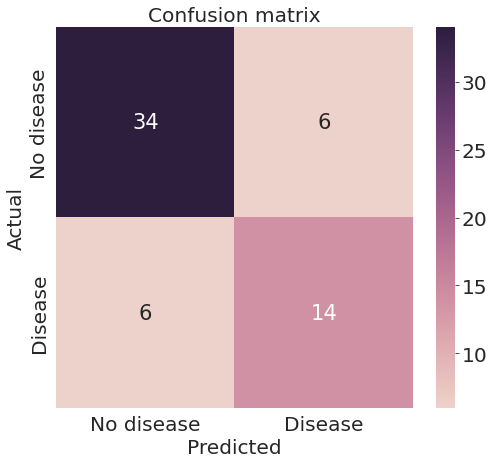

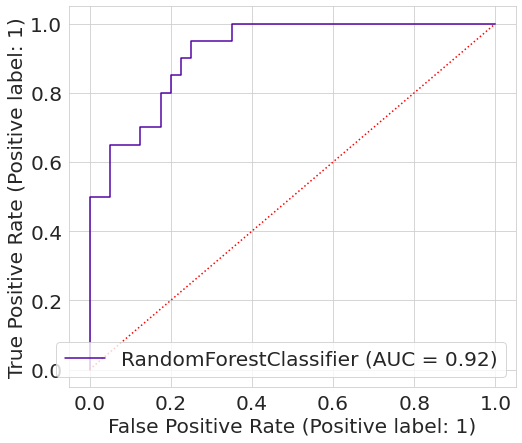

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'max_depth': 14, 'n_estimators': 200} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8333333333333334 0.7083333333333334 0.85 0.7727272727272727


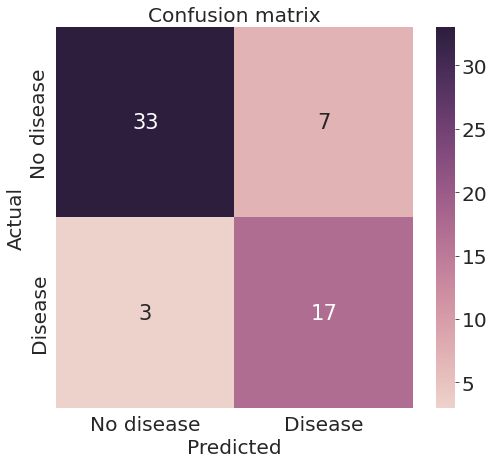

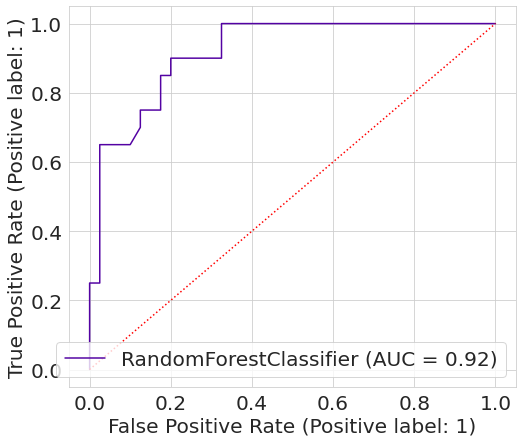

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'max_depth': 6, 'n_estimators': 50} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8 0.6818181818181818 0.75 0.7142857142857143


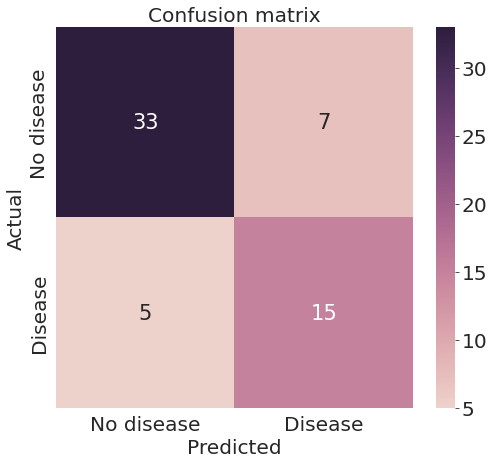

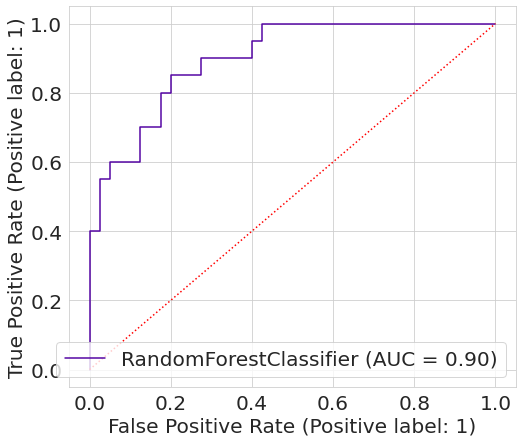

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'max_depth': 12, 'n_estimators': 50} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8 0.6818181818181818 0.75 0.7142857142857143


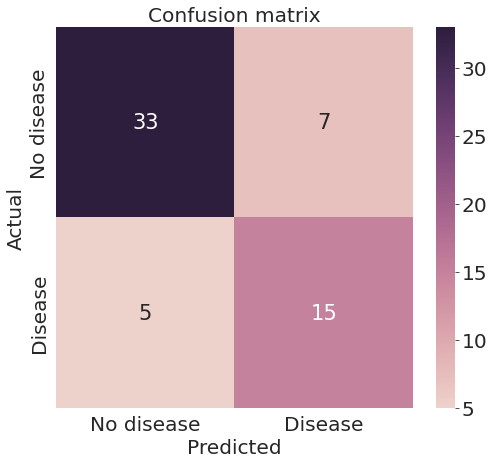

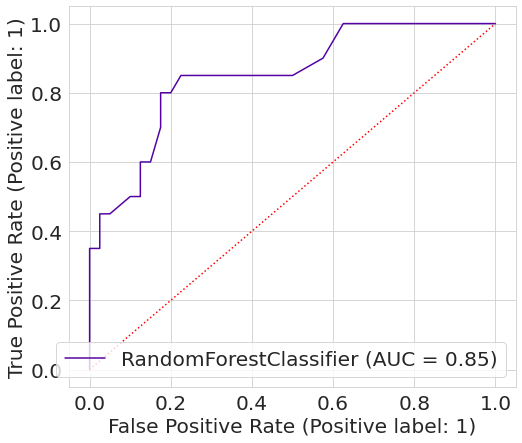

{'accuracy': {'vanilla': [0.8], 'outliers': [0.8333333333333334], 'outliers + smote': [0.8], 'outliers + smote + pca': [0.8]}, 'precision': {'vanilla': [0.7], 'outliers': [0.7083333333333334], 'outliers + smote': [0.6818181818181818], 'outliers + smote + pca': [0.6818181818181818]}, 'recall': {'vanilla': [0.7], 'outliers': [0.85], 'outliers + smote': [0.75], 'outliers + smote + pca': [0.75]}, 'f1': {'vanilla': [0.7], 'outliers': [0.7727272727272727], 'outliers + smote': [0.7142857142857143], 'outliers + smote + pca': [0.7142857142857143]}}


In [ ]:
# change folder to save the images in the proper spot
%cd /content/drive/MyDrive/MML/visualizations/Random Forest

# we can toggle outliers, over sampling, pca. Normalization is always on
LOG = {
    "accuracy": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "precision": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "recall": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "f1": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    }


model = RandomForestClassifier
params_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 4, 6, 10, 12, 14],
}

# vanilla
run_name = "vanilla"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = False, 
                                                  oversampling = False,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True
                                                 ) 
LOG['accuracy']['vanilla'].append(accuracy)
LOG['precision']['vanilla'].append(precision)
LOG['recall']['vanilla'].append(recall)
LOG['f1']['vanilla'].append(f1)


# outliers
model = RandomForestClassifier
run_name = "outrem"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = False,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True
                                                 ) 
LOG['accuracy']['outliers'].append(accuracy)
LOG['precision']['outliers'].append(precision)
LOG['recall']['outliers'].append(recall)
LOG['f1']['outliers'].append(f1)


# outliers + smote
model = RandomForestClassifier
run_name = "outsmote"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = True,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True                                               
                                                 ) 
LOG['accuracy']['outliers + smote'].append(accuracy)
LOG['precision']['outliers + smote'].append(precision)
LOG['recall']['outliers + smote'].append(recall)
LOG['f1']['outliers + smote'].append(f1)

# outliers + smote + pca
model = RandomForestClassifier
run_name = "outsmotepca"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = True,
                                                  pca = True,
                                                  pca_components = 5,
                                                  std = True
                                                 ) 
LOG['accuracy']['outliers + smote + pca'].append(accuracy)
LOG['precision']['outliers + smote + pca'].append(precision)
LOG['recall']['outliers + smote + pca'].append(recall)
LOG['f1']['outliers + smote + pca'].append(f1)

#save log file to print it later
filename = "LOG_FILE.pickle"
with open(filename, 'wb') as outp:  # Overwrites any existing file.
  pickle.dump(LOG, outp, pickle.HIGHEST_PROTOCOL)

print(LOG)


## data viz

/content/drive/MyDrive/MML/visualizations/Random Forest


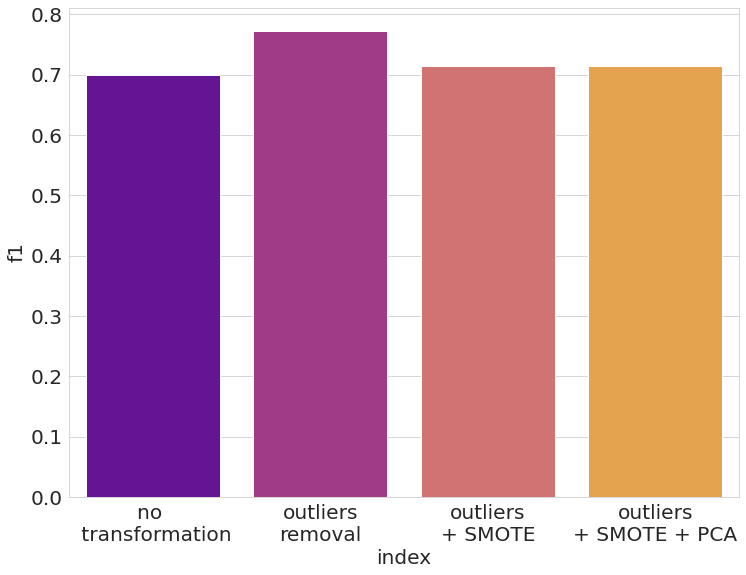

In [ ]:
%cd /content/drive/MyDrive/MML/visualizations/Random Forest


# retrieve the dictionary containing the log
filename = "LOG_FILE.pickle"
with open(filename, 'rb') as f:
    LOG = pickle.load(f)

metric = 'f1'
LOGdf = pd.DataFrame(data = LOG)
LOGdf[metric] = LOGdf[metric].apply(lambda x: x[0])
LOGdf.reset_index(inplace = True)

f, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,9)
sns.barplot(data= LOGdf, x= 'index', y= metric, palette= 'plasma' )
ax.set_xticklabels(['no \n transformation','outliers\nremoval','outliers\n+ SMOTE','outliers\n+ SMOTE + PCA'])
plt.savefig(metric+'scores.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
plt.show()

# KNN 

Performing cross-validation...
Done. 
Best configuration:  {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8833333333333333 0.8 0.9090909090909091 0.8510638297872342


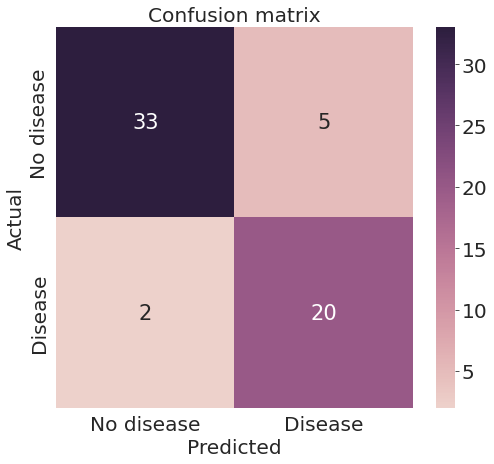

Num samples before outlier removal:  237
Num samples after outlier removal:  233
Performing cross-validation...
Done. 
Best configuration:  {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.85 0.782608695652174 0.8181818181818182 0.8


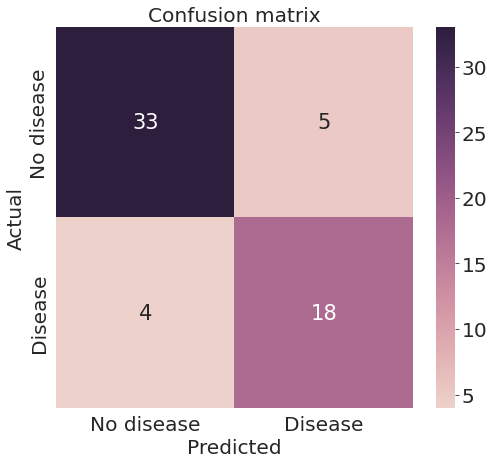

Num samples before outlier removal:  237
Num samples after outlier removal:  233
Performing cross-validation...
Done. 
Best configuration:  {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8666666666666667 0.7916666666666666 0.8636363636363636 0.8260869565217391


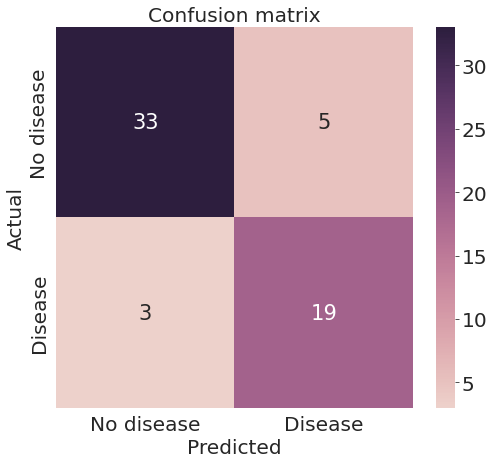

Num samples before outlier removal:  237
Num samples after outlier removal:  233
Performing cross-validation...
Done. 
Best configuration:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8 0.6666666666666666 0.9090909090909091 0.7692307692307692


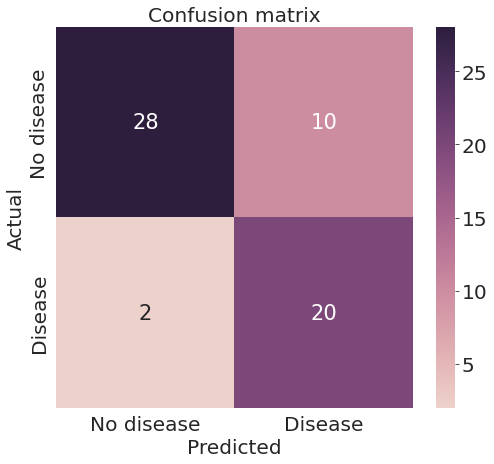

{'accuracy': {'vanilla': [0.8833333333333333], 'outliers': [0.85], 'outliers + smote': [0.8666666666666667], 'outliers + smote + pca': [0.8]}, 'precision': {'vanilla': [0.8], 'outliers': [0.782608695652174], 'outliers + smote': [0.7916666666666666], 'outliers + smote + pca': [0.6666666666666666]}, 'recall': {'vanilla': [0.9090909090909091], 'outliers': [0.8181818181818182], 'outliers + smote': [0.8636363636363636], 'outliers + smote + pca': [0.9090909090909091]}, 'f1': {'vanilla': [0.8510638297872342], 'outliers': [0.8], 'outliers + smote': [0.8260869565217391], 'outliers + smote + pca': [0.7692307692307692]}}


In [ ]:
# change folder to save the images in the proper spot
%cd /content/drive/MyDrive/MML/visualizations/KNN

# we can toggle outliers, over sampling, pca. Normalization is always on
LOG = {
    "accuracy": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "precision": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "recall": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "f1": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    }


model = KNeighborsClassifier
params_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 40],
    'weights': ["uniform", "distance"],
    'metric' : ["euclidean", "manhattan"] }

# vanilla
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  outliers_removal = False, 
                                                  oversampling = False,
                                                  pca = False,
                                                  pca_components = None
                                                 ) 
LOG['accuracy']['vanilla'].append(accuracy)
LOG['precision']['vanilla'].append(precision)
LOG['recall']['vanilla'].append(recall)
LOG['f1']['vanilla'].append(f1)


# outliers
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  outliers_removal = True, 
                                                  oversampling = False,
                                                  pca = False,
                                                  pca_components = None
                                                 ) 
LOG['accuracy']['outliers'].append(accuracy)
LOG['precision']['outliers'].append(precision)
LOG['recall']['outliers'].append(recall)
LOG['f1']['outliers'].append(f1)


# outliers + smote
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  outliers_removal = True, 
                                                  oversampling = True,
                                                  pca = False,
                                                  pca_components = None
                                                 ) 
LOG['accuracy']['outliers + smote'].append(accuracy)
LOG['precision']['outliers + smote'].append(precision)
LOG['recall']['outliers + smote'].append(recall)
LOG['f1']['outliers + smote'].append(f1)

# outliers + smote + pca
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  outliers_removal = True, 
                                                  oversampling = True,
                                                  pca = True,
                                                  pca_components = 8
                                                 ) 
LOG['accuracy']['outliers + smote + pca'].append(accuracy)
LOG['precision']['outliers + smote + pca'].append(precision)
LOG['recall']['outliers + smote + pca'].append(recall)
LOG['f1']['outliers + smote + pca'].append(f1)


print(LOG)

## data viz

In [ ]:
%cd /content/drive/MyDrive/MML/visualizations/KNN


# retrieve the dictionary containing the log
filename = "LOG_FILE.pickle"
with open(filename, 'rb') as f:
    LOG = pickle.load(f)

metric = 'f1'
LOGdf = pd.DataFrame(data = LOG)
LOGdf[metric] = LOGdf[metric].apply(lambda x: x[0])
LOGdf.reset_index(inplace = True)

f, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,9)
sns.barplot(data= LOGdf, x= 'index', y= metric, palette= 'plasma' )
ax.set_xticklabels(['no \n transformation','outliers\nremoval','outliers\n+ SMOTE','outliers\n+ SMOTE + PCA'])
plt.savefig(metric+'scores.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
plt.show()

# SVM 

/content/drive/MyDrive/MML/visualizations/SVM
Performing cross-validation...
Done. 
Best configuration:  {'C': 2, 'kernel': 'linear'} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8 0.7 0.7 0.7


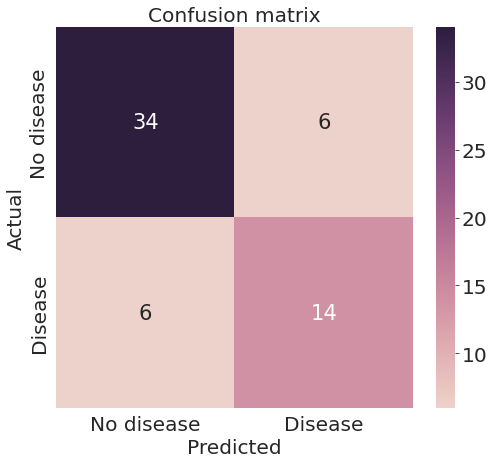

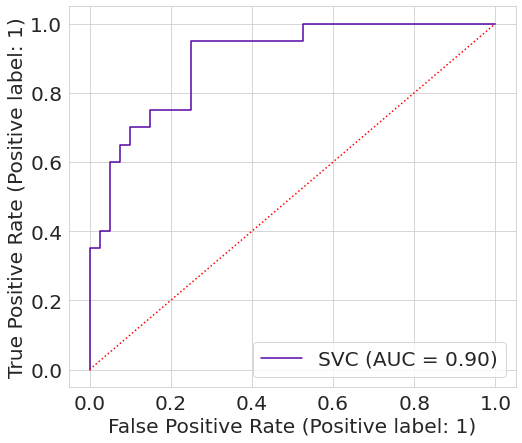

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'C': 1, 'kernel': 'poly'} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.7833333333333333 0.6666666666666666 0.7 0.6829268292682926


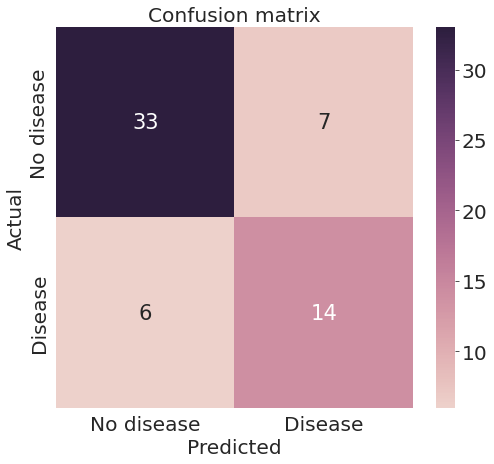

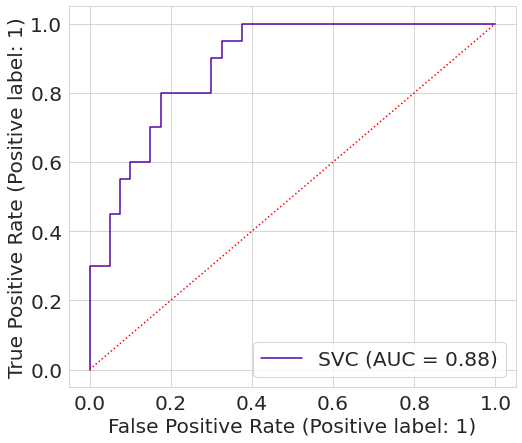

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'C': 1, 'kernel': 'poly'} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.7833333333333333 0.6666666666666666 0.7 0.6829268292682926


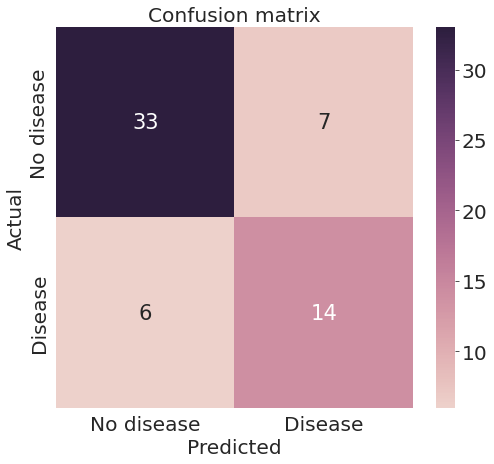

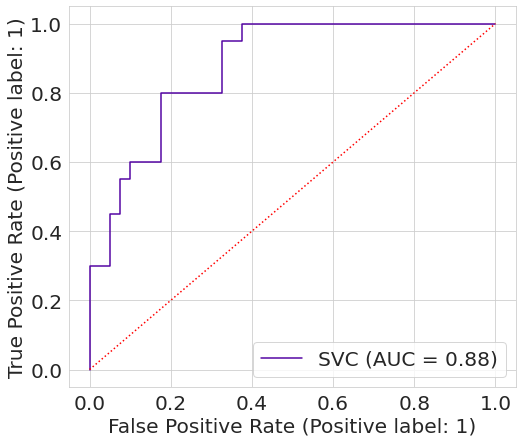

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'C': 2, 'kernel': 'poly'} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.8333333333333334 0.7272727272727273 0.8 0.761904761904762


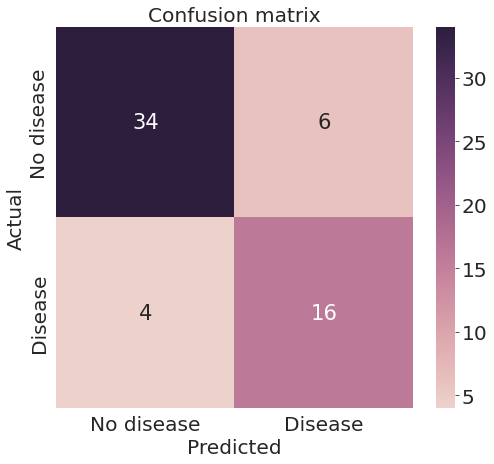

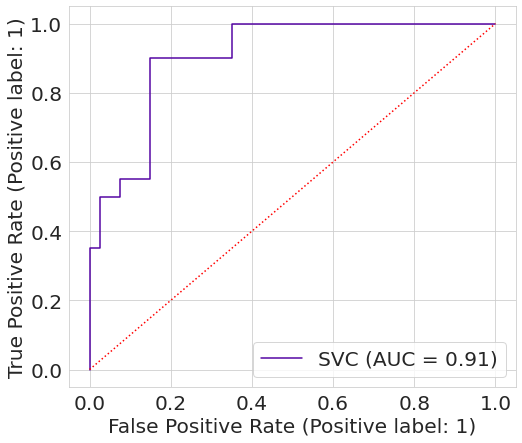

{'accuracy': {'vanilla': [0.8], 'outliers': [0.7833333333333333], 'outliers + smote': [0.7833333333333333], 'outliers + smote + pca': [0.8333333333333334]}, 'precision': {'vanilla': [0.7], 'outliers': [0.6666666666666666], 'outliers + smote': [0.6666666666666666], 'outliers + smote + pca': [0.7272727272727273]}, 'recall': {'vanilla': [0.7], 'outliers': [0.7], 'outliers + smote': [0.7], 'outliers + smote + pca': [0.8]}, 'f1': {'vanilla': [0.7], 'outliers': [0.6829268292682926], 'outliers + smote': [0.6829268292682926], 'outliers + smote + pca': [0.761904761904762]}}


In [ ]:
# splitting of data-set with 80% of samples for training set
np.random.seed(seed=420)
X = df.drop(labels = 'target', axis = 1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)



# change folder to save the images in the proper spot
%cd /content/drive/MyDrive/MML/visualizations/SVM

# we can toggle outliers, over sampling, pca. Normalization is always on
LOG = {
    "accuracy": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "precision": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "recall": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "f1": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    }



model = SVC
params_grid = {
    "kernel" : {"linear", "poly", "rbf"},
    "C" : {0.1, 0.5, 1, 2}
}

# vanilla
run_name = "vanilla"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = False, 
                                                  oversampling = False,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True
                                                 ) 
LOG['accuracy']['vanilla'].append(accuracy)
LOG['precision']['vanilla'].append(precision)
LOG['recall']['vanilla'].append(recall)
LOG['f1']['vanilla'].append(f1)


# outliers
model = SVC
run_name = "outrem"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = False,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True
                                                 ) 
LOG['accuracy']['outliers'].append(accuracy)
LOG['precision']['outliers'].append(precision)
LOG['recall']['outliers'].append(recall)
LOG['f1']['outliers'].append(f1)


# outliers + smote
model = SVC
run_name = "outsmote"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = True,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True                                               
                                                 ) 
LOG['accuracy']['outliers + smote'].append(accuracy)
LOG['precision']['outliers + smote'].append(precision)
LOG['recall']['outliers + smote'].append(recall)
LOG['f1']['outliers + smote'].append(f1)

# outliers + smote + pca
model = SVC
run_name = "outsmotepca"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = True,
                                                  pca = True,
                                                  pca_components = 8,
                                                  std = True
                                                 ) 
LOG['accuracy']['outliers + smote + pca'].append(accuracy)
LOG['precision']['outliers + smote + pca'].append(precision)
LOG['recall']['outliers + smote + pca'].append(recall)
LOG['f1']['outliers + smote + pca'].append(f1)

#save log file to print it later
filename = "LOG_FILE.pickle"
with open(filename, 'wb') as outp:  # Overwrites any existing file.
  pickle.dump(LOG, outp, pickle.HIGHEST_PROTOCOL)

print(LOG)




## data viz

/content/drive/MyDrive/MML/visualizations/SVM/report


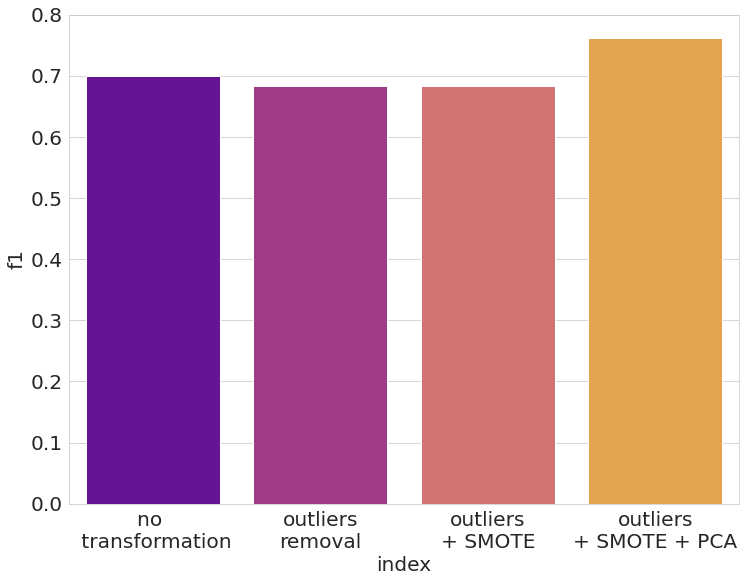

In [ ]:
%cd /content/drive/MyDrive/MML/visualizations/SVM/report


# retrieve the dictionary containing the log
filename = "LOG_FILE.pickle"
with open(filename, 'rb') as f:
    LOG = pickle.load(f)

metric = 'f1'
LOGdf = pd.DataFrame(data = LOG)
LOGdf[metric] = LOGdf[metric].apply(lambda x: x[0])
LOGdf.reset_index(inplace = True)

f, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,9)
sns.barplot(data= LOGdf, x= 'index', y= metric, palette= 'plasma' )
ax.set_xticklabels(['no \n transformation','outliers\nremoval','outliers\n+ SMOTE','outliers\n+ SMOTE + PCA'])
plt.savefig(metric+'scores.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
plt.show()

# decision tree

/content/drive/MyDrive/MML/visualizations/Decision Tree
Performing cross-validation...
Done. 
Best configuration:  {'criterion': 'entropy', 'max_depth': 10} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.7333333333333333 0.5769230769230769 0.75 0.6521739130434783


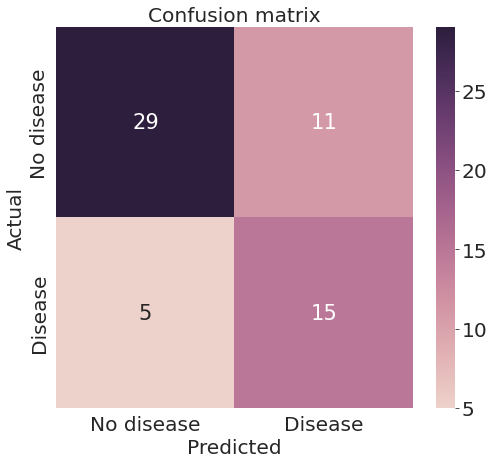

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


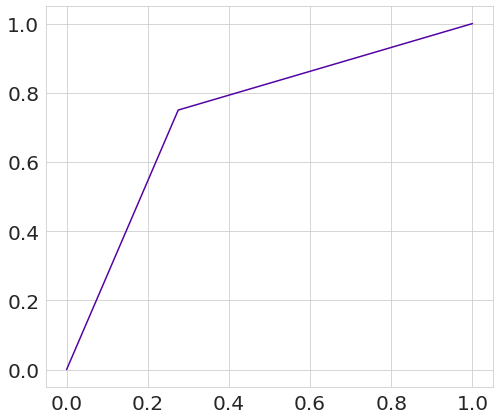

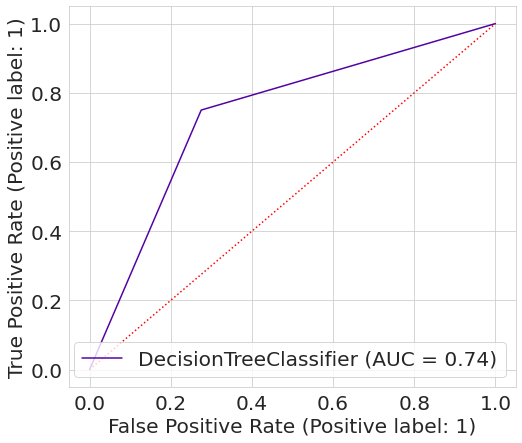

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'criterion': 'entropy', 'max_depth': 8} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.7833333333333333 0.64 0.8 0.7111111111111111


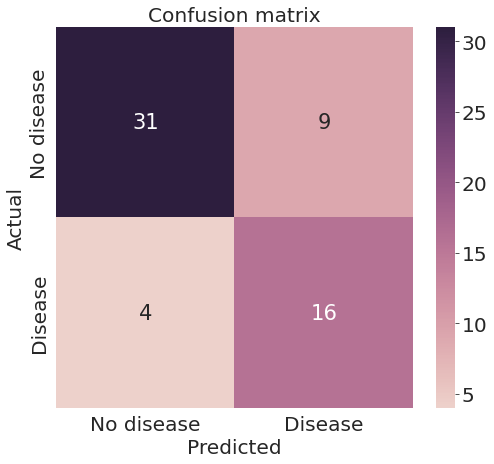

[[0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]


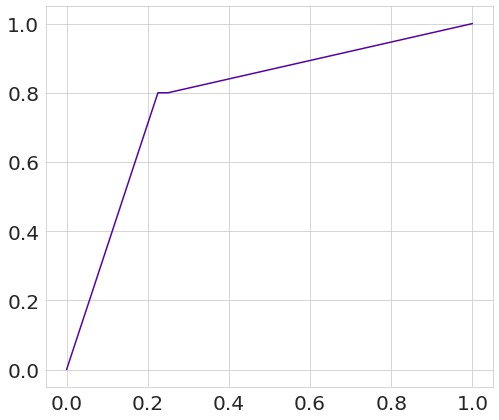

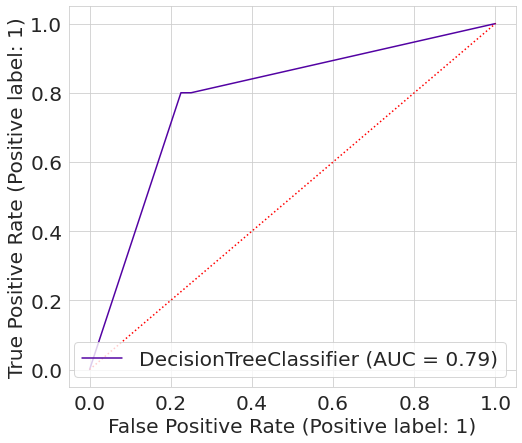

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'criterion': 'gini', 'max_depth': 10} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.75 0.6 0.75 0.6666666666666665


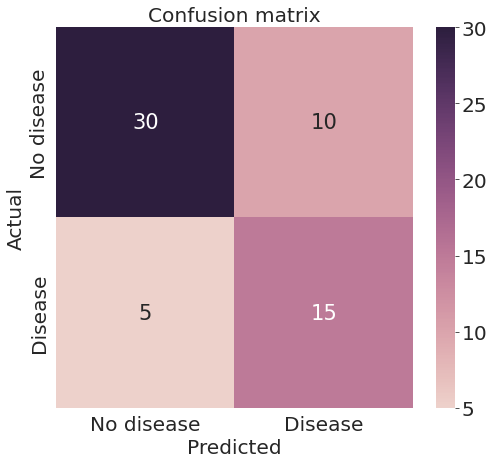

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


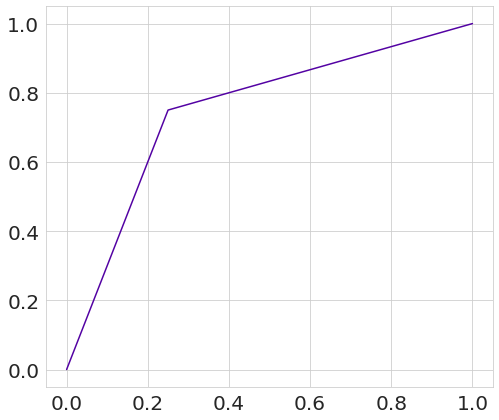

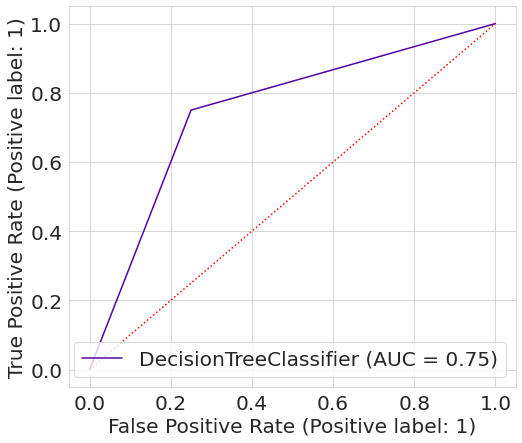

Num samples before outlier removal:  237
Num samples after outlier removal:  227
Performing cross-validation...
Done. 
Best configuration:  {'criterion': 'gini', 'max_depth': 20} 

testing best configuration on the whole training data...
Score: Accuracy, precision, recall, f1 

0.85 0.7894736842105263 0.75 0.7692307692307692


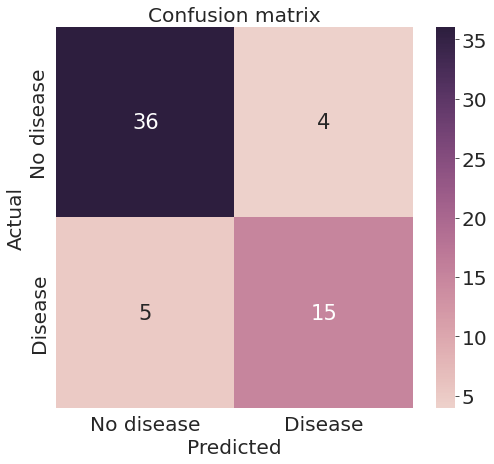

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


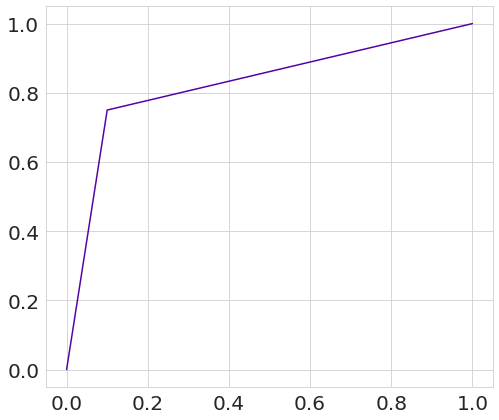

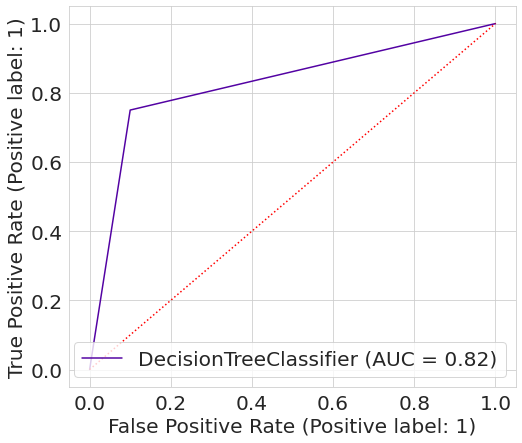

{'accuracy': {'vanilla': [0.7333333333333333], 'outliers': [0.7833333333333333], 'outliers + smote': [0.75], 'outliers + smote + pca': [0.85]}, 'precision': {'vanilla': [0.5769230769230769], 'outliers': [0.64], 'outliers + smote': [0.6], 'outliers + smote + pca': [0.7894736842105263]}, 'recall': {'vanilla': [0.75], 'outliers': [0.8], 'outliers + smote': [0.75], 'outliers + smote + pca': [0.75]}, 'f1': {'vanilla': [0.6521739130434783], 'outliers': [0.7111111111111111], 'outliers + smote': [0.6666666666666665], 'outliers + smote + pca': [0.7692307692307692]}}


In [ ]:
# change folder to save the images in the proper spot SEED 420
%cd /content/drive/MyDrive/MML/visualizations/Decision Tree

# we can toggle outliers, over sampling, pca. Normalization is always on
LOG = {
    "accuracy": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "precision": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "recall": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    "f1": {"vanilla": [], "outliers" : [], "outliers + smote": [], "outliers + smote + pca": []}, 
    }



model = DecisionTreeClassifier
params_grid = {
    'max_depth': [None, 5, 8, 10, 12, 20], 
    "criterion" : ["gini", "entropy"],
}


# vanilla
run_name = "vanilla"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = False, 
                                                  oversampling = False,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True
                                                 ) 
LOG['accuracy']['vanilla'].append(accuracy)
LOG['precision']['vanilla'].append(precision)
LOG['recall']['vanilla'].append(recall)
LOG['f1']['vanilla'].append(f1)


# outliers
run_name = "outrem"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = False,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True
                                                 ) 
LOG['accuracy']['outliers'].append(accuracy)
LOG['precision']['outliers'].append(precision)
LOG['recall']['outliers'].append(recall)
LOG['f1']['outliers'].append(f1)


# outliers + smote
run_name = "outsmote"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = True,
                                                  pca = False,
                                                  pca_components = None,
                                                  std = True                                               
                                                 ) 
LOG['accuracy']['outliers + smote'].append(accuracy)
LOG['precision']['outliers + smote'].append(precision)
LOG['recall']['outliers + smote'].append(recall)
LOG['f1']['outliers + smote'].append(f1)

# outliers + smote + pca
run_name = "outsmotepca"
accuracy, precision, recall, f1 = evaluate_model(model, params_grid, X_train, X_test, y_train, y_test,
                                                  run_name = run_name,
                                                  outliers_removal = True, 
                                                  oversampling = True,
                                                  pca = True,
                                                  pca_components = 8,
                                                  std = True
                                                 ) 
LOG['accuracy']['outliers + smote + pca'].append(accuracy)
LOG['precision']['outliers + smote + pca'].append(precision)
LOG['recall']['outliers + smote + pca'].append(recall)
LOG['f1']['outliers + smote + pca'].append(f1)

#save log file to print it later
filename = "LOG_FILE.pickle"
with open(filename, 'wb') as outp:  # Overwrites any existing file.
  pickle.dump(LOG, outp, pickle.HIGHEST_PROTOCOL)

print(LOG)




## data viz

/content/drive/MyDrive/MML/visualizations/Decision Tree


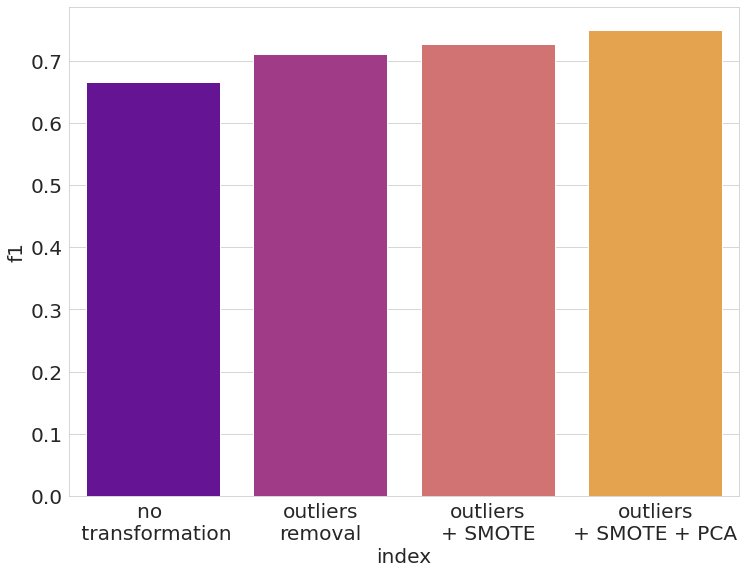

In [ ]:
# get in the correct directory
%cd /content/drive/MyDrive/MML/visualizations/Decision Tree

# retrieve the dictionary containing the log
filename = "LOG_FILE.pickle"
with open(filename, 'rb') as f:
    LOG = pickle.load(f)

metric = 'f1'
LOGdf = pd.DataFrame(data = LOG)
LOGdf[metric] = LOGdf[metric].apply(lambda x: x[0])
LOGdf.reset_index(inplace = True)

f, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,9)
sns.barplot(data= LOGdf, x= 'index', y= metric, palette= 'plasma' )
ax.set_xticklabels(['no \n transformation','outliers\nremoval','outliers\n+ SMOTE','outliers\n+ SMOTE + PCA'])
plt.savefig(metric+'scores.svg',
              dpi=300,
              format='svg',
              bbox_inches='tight'
              )
plt.show()

# Final visualization

/content/drive/MyDrive/MML/visualizations/final scores


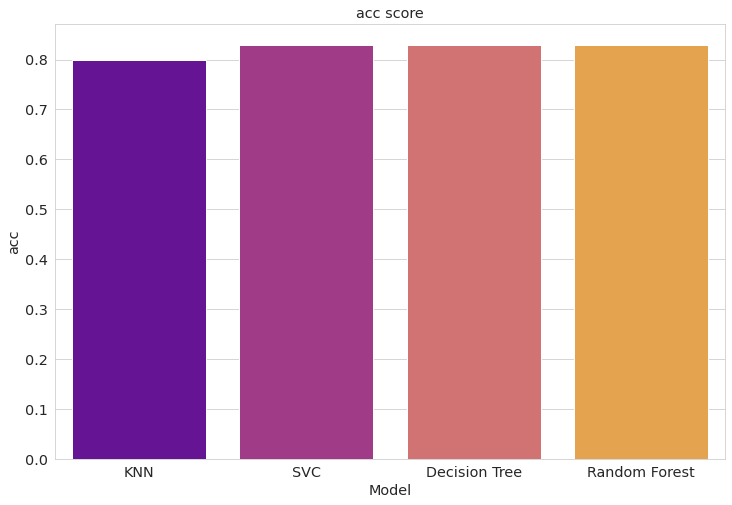

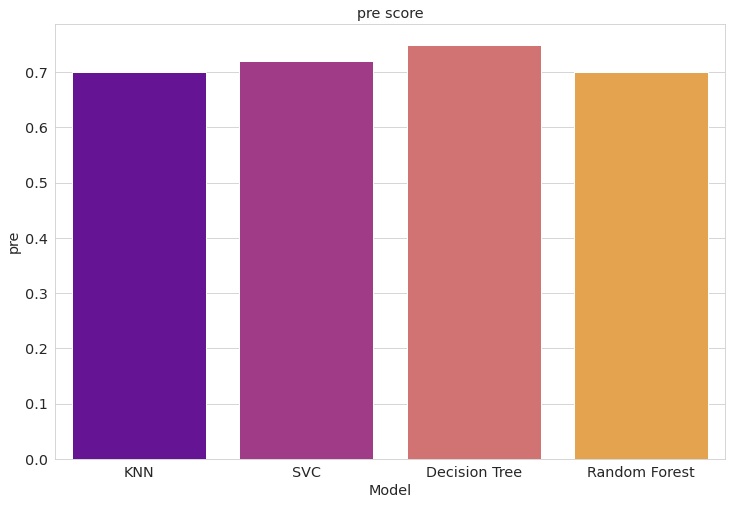

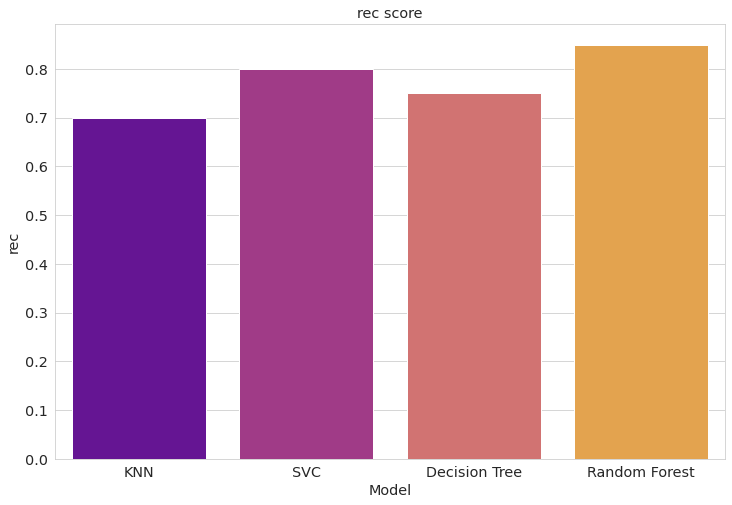

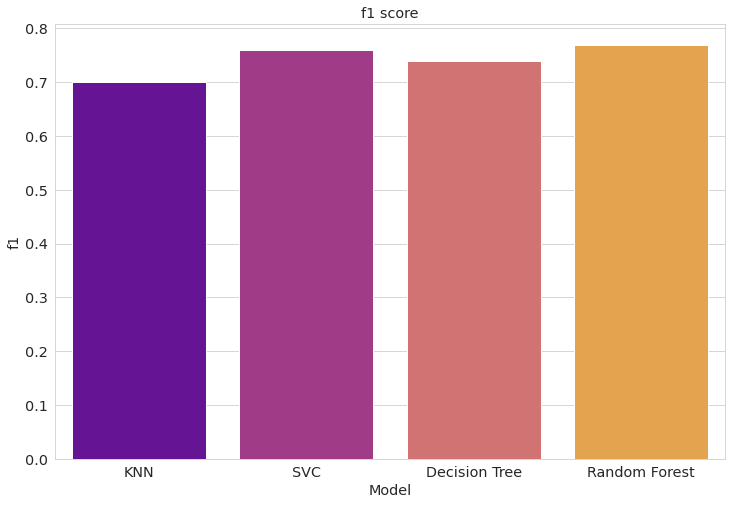

In [ ]:
%cd /content/drive/MyDrive/MML/visualizations/final scores

# performance scored
score_dict = {'knn': {'acc': 0.8, 'pre': 0.7, 'rec': 0.7 ,'f1': 0.7 },
 'svm': {'acc': 0.83, 'pre': 0.72, 'rec':0.8 ,'f1':0.76},
 'dt': {'acc': 0.83, 'pre':0.75, 'rec':0.75 ,'f1':0.74},
 'rf': {'acc':0.83, 'pre':0.70, 'rec': 0.85 ,'f1':0.77}}
score_df = pd.DataFrame(data = score_dict)


for score in list(score_df.index):
  f, ax = plt.subplots()
  plt.rcParams["figure.figsize"] = (12,8)
  scores = score_df.loc[score].reset_index()
  sns.barplot(data= scores, x='index', y = score, palette= 'plasma' )
  ax.set_xticklabels(['KNN','SVC','Decision Tree','Random Forest'])
  
  plt.xlabel('Model')
  plt.title(score + ' score')
  plt.savefig(score + 'scores.svg',
                dpi=300,
                format='svg',
                bbox_inches='tight'
                )
  plt.show()